## Dataset
In this homework, we will use the California Housing Prices data from Kaggle. <br>
<br>
Here's a wget-able link:<br>
<br>
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv<br>
We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.<br>
<br>
#### Features
For the rest of the homework, you'll need to use only these columns: <br>
<br>
- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value',
- 'ocean_proximity',


### Data preparation

- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df_full= df.copy()

In [7]:
df_full.fillna(0,inplace=True)

In [8]:
df_full.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
df_full['rooms_per_household']=df_full['total_rooms']/df_full['households']

In [10]:
df_full['bedrooms_per_room']=df_full['total_bedrooms']/df_full['total_rooms']

In [11]:
df_full['population_per_household']=df_full['population']/df_full['households']

In [12]:
df_full

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


### Question 1 <br>
What is the most frequent observation (mode) for the column ocean_proximity?

In [13]:
df_full.ocean_proximity.mode()[0]

'<1H OCEAN'

## Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_f_train,df_test=train_test_split(df_full, test_size=0.20, random_state=42)

In [16]:
df_train,df_val=train_test_split(df_f_train, test_size=0.25, random_state=42)

In [17]:
df_train.shape ,  df_val.shape , df_test.shape

((12384, 13), (4128, 13), (4128, 13))

In [18]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


In [19]:
X_train=df_train.drop(['median_house_value'], axis=1).values
X_val=df_val.drop(['median_house_value'], axis=1).values
X_test=df_test.drop(['median_house_value'], axis=1).values

y_train=df_train['median_house_value'].values
y_val=df_val['median_house_value'].values
y_test=df_test['median_house_value'].values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [20]:
X_train

array([[-119.67, 34.43, 39.0, ..., 3.9224598930481283,
        0.25971370143149286, 3.7540106951871657],
       [-118.32, 33.74, 24.0, ..., 7.564516129032258,
        0.13022798097424962, 2.7890818858560795],
       [-121.62, 39.13, 41.0, ..., 3.908011869436202,
        0.23462414578587698, 2.540059347181009],
       ...,
       [-116.99, 32.74, 18.0, ..., 5.54983388704319, 0.1828793774319066,
        3.2425249169435215],
       [-117.87, 33.84, 16.0, ..., 4.414285714285715, 0.229126213592233,
        2.085714285714286],
       [-118.32, 33.91, 35.0, ..., 4.372093023255814,
        0.20957446808510638, 2.9767441860465116]], dtype=object)

### Question 2
- Create the correlation matrix for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?

In [21]:
numerical_features = df_train.drop(['ocean_proximity'], axis=1)
cor=numerical_features.corr()
cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,-0.034814,0.119118,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,0.102320,-0.124507,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


<AxesSubplot:>

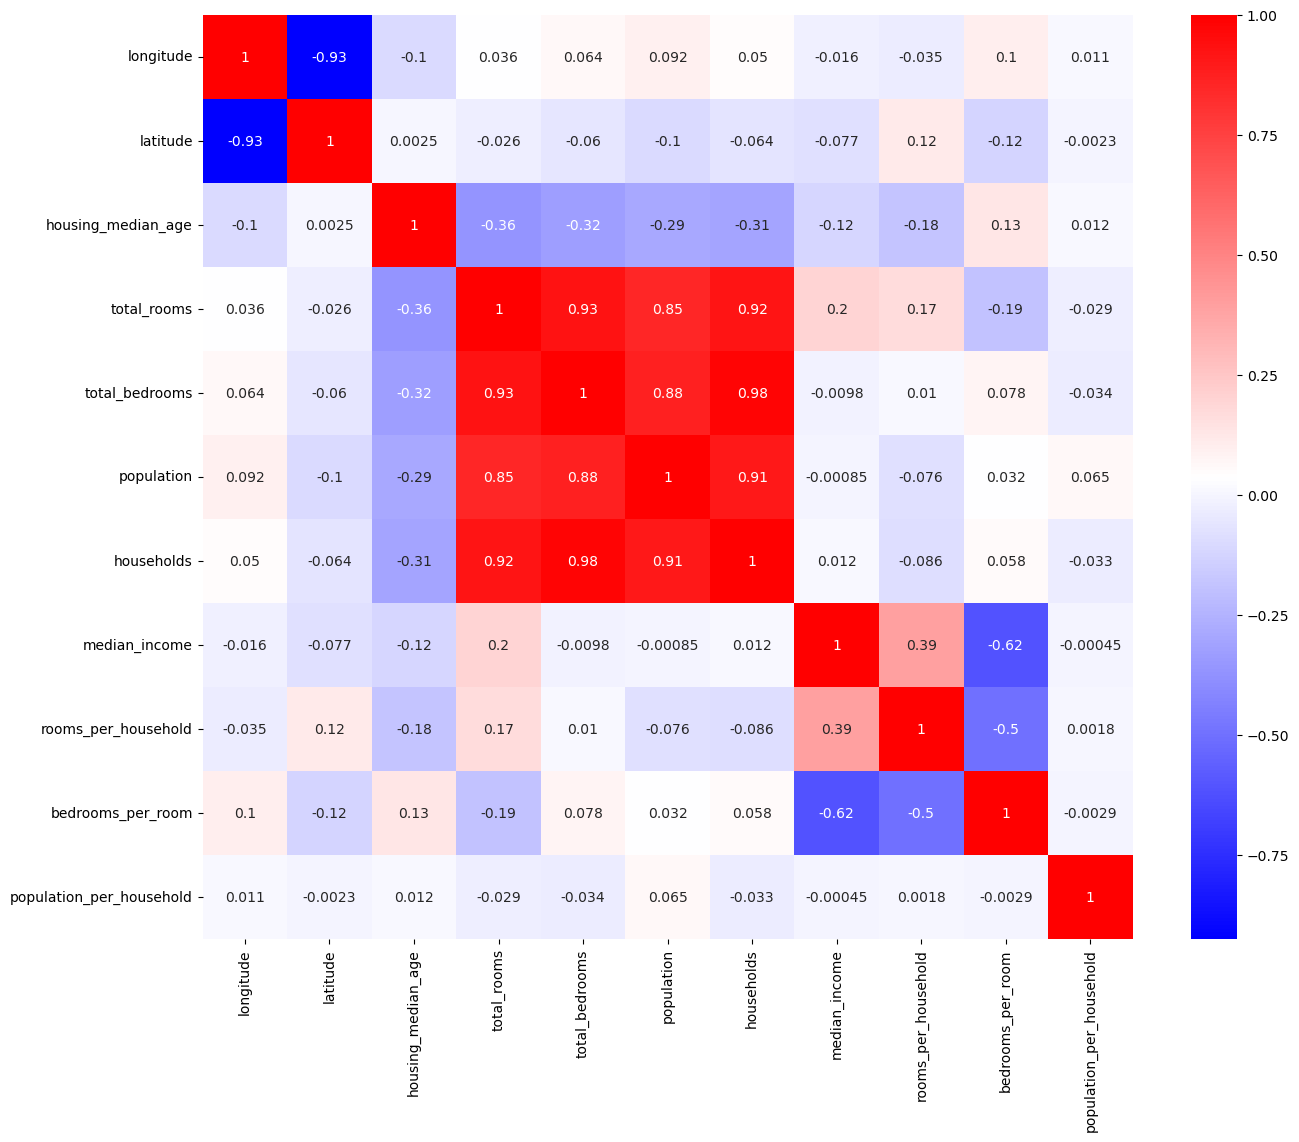

In [22]:
plt.figure(figsize=(15,12))

sns.heatmap(cor, cmap='bwr', annot=True)

### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary. <br>
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [23]:
avg=df_f_train['median_house_value'].mean()
avg

207194.6937378876

In [24]:
above_average= (y_train >=avg).astype(int)
above_average

array([1, 1, 0, ..., 1, 0, 0])

In [25]:
y_train_binarized=(y_train >=avg).astype(int)
y_val_binarized=(y_val >=avg).astype(int)
y_test_binarized=(y_test >=avg).astype(int)


### Question 3 
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only. <br>
What is the value of mutual information? <br>
Round it to 2 decimal digits using round(score, 2)

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
mutual_score=mutual_info_score(above_average, df_train['ocean_proximity'])
round(mutual_score,2)

0.1

### Question 4
Now let's train a logistic regression <br>
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding. <br>
Fit the model on the training dataset. <br>
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters: <br>
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42) <br>
Calculate the accuracy on the validation dataset and round it to 2 decimal digits. <br>


In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [29]:
dictVec= DictVectorizer( sparse=False)

In [30]:
dict_train=df_train.to_dict(orient='records')

X_train=dictVec.fit_transform(dict_train)

In [31]:
dict_train

[{'longitude': -119.67,
  'latitude': 34.43,
  'housing_median_age': 39.0,
  'total_rooms': 1467.0,
  'total_bedrooms': 381.0,
  'population': 1404.0,
  'households': 374.0,
  'median_income': 2.3681,
  'ocean_proximity': '<1H OCEAN',
  'rooms_per_household': 3.9224598930481283,
  'bedrooms_per_room': 0.25971370143149286,
  'population_per_household': 3.7540106951871657},
 {'longitude': -118.32,
  'latitude': 33.74,
  'housing_median_age': 24.0,
  'total_rooms': 6097.0,
  'total_bedrooms': 794.0,
  'population': 2248.0,
  'households': 806.0,
  'median_income': 10.1357,
  'ocean_proximity': 'NEAR OCEAN',
  'rooms_per_household': 7.564516129032258,
  'bedrooms_per_room': 0.13022798097424962,
  'population_per_household': 2.7890818858560795},
 {'longitude': -121.62,
  'latitude': 39.13,
  'housing_median_age': 41.0,
  'total_rooms': 1317.0,
  'total_bedrooms': 309.0,
  'population': 856.0,
  'households': 337.0,
  'median_income': 1.6719,
  'ocean_proximity': 'INLAND',
  'rooms_per_house

In [32]:
dict_val=df_val.to_dict(orient='records')

X_val=dictVec.transform(dict_val)


dict_test=df_test.to_dict(orient='records')

X_test=dictVec.transform(dict_test)

In [33]:
dictVec.get_feature_names()

C:\Users\Asia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [34]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [35]:
model.fit(X_train,y_train_binarized)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [36]:
y_pridected=model.predict_proba(X_val)[:,1]

In [37]:
y_pridected

array([0.0793187 , 0.1752565 , 0.95441597, ..., 0.96359331, 0.85262405,
       0.44668477])

In [38]:
(y_pridected>=0.5)

array([False, False,  True, ...,  True,  True, False])

In [39]:
y_val_binarized

array([0, 0, 1, ..., 1, 1, 0])

In [40]:
def model_acc(y_val, y_predict):
    median_house_value_decision= (y_pridected>=0.5)
    return (y_val==median_house_value_decision).mean()

In [41]:
global_accuracy=model_acc(y_val_binarized,y_pridected).round(2)
print('Model accuracy is ', global_accuracy)

Model accuracy is  0.84


### Question 5
Let's find the least useful feature using the feature elimination technique. <br>
Train a model with all these features (using the same parameters as in Q4). <br>
Now exclude each feature from this set and train a model without it. Record the accuracy for each model. <br>
For each feature, calculate the difference between the original accuracy and the accuracy without the feature. <br>
Which of following feature has the smallest difference? <br>


In [42]:
featureslist=df_train

acc={}
acc_diff={}
#df_train=pd.DataFrame(X_train, columns=featureslist)
#df_val=pd.DataFrame(X_val, columns=featureslist)

In [43]:
for i in featureslist:
    f=list(featureslist)
    f.remove(i)
    df_trn=df_train[f]
    dictVec_i= DictVectorizer( sparse=False)
    dict_trn=df_trn.to_dict(orient='records')
    X_train1=dictVec_i.fit_transform(dict_trn)
    
    df_v=df_val[f]
    dict_v=df_val.to_dict(orient='records')
    X_val1=dictVec_i.transform(dict_v)
    
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train1, y_train_binarized)
    y_pridected=model.predict_proba(X_val1)[:,1]
    
    acc[i]= model_acc(y_val_binarized,y_pridected)
    acc_diff[i]= global_accuracy -   acc[i]
    
    


In [44]:
acc

{'longitude': 0.8343023255813954,
 'latitude': 0.8318798449612403,
 'housing_median_age': 0.8347868217054264,
 'total_rooms': 0.8372093023255814,
 'total_bedrooms': 0.8357558139534884,
 'population': 0.8265503875968992,
 'households': 0.8340600775193798,
 'median_income': 0.7865794573643411,
 'ocean_proximity': 0.8209786821705426,
 'rooms_per_household': 0.8352713178294574,
 'bedrooms_per_room': 0.8362403100775194,
 'population_per_household': 0.8359980620155039}

In [45]:
acc_diff

{'longitude': 0.005697674418604581,
 'latitude': 0.008120155038759624,
 'housing_median_age': 0.005213178294573573,
 'total_rooms': 0.0027906976744185297,
 'total_bedrooms': 0.0042441860465115555,
 'population': 0.01344961240310072,
 'households': 0.005939922480620141,
 'median_income': 0.053420542635658874,
 'ocean_proximity': 0.019021317829457374,
 'rooms_per_household': 0.004728682170542564,
 'bedrooms_per_room': 0.003759689922480547,
 'population_per_household': 0.004001937984496107}

In [46]:
lowest_diff=np.array(list(acc_diff.values())).min()
lowest_diff

0.0027906976744185297

In [47]:
for i ,j in acc_diff.items():
    if j==lowest_diff:
        print(f"{i} is the feature that has the smallest difference ")
        break

total_rooms is the feature that has the smallest difference 


### Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn <br>
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [48]:
y_train=np.log1p(y_train)
y_val=np.log1p(y_val)
y_test=np.log1p( y_test)

In [49]:
def RMSE(y, pridect_y):
    diff=pridect_y-y
    return np.sqrt((diff**2).mean())

In [50]:
from sklearn.linear_model import Ridge

dict2={}
for i in [0, 0.01, 0.1, 1, 10]:

    model = Ridge(alpha=i, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_predicted=model.predict(X_val)
    dict2[i]=round(RMSE(y_val,y_predicted),3) 
    

In [51]:
y_val

array([11.47937902, 11.23190118, 12.97363364, ..., 12.74898107,
       12.8682476 , 12.12378283])

In [52]:
dict2

{0: 0.524, 0.01: 0.524, 0.1: 0.524, 1: 0.524, 10: 0.524}